In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
data = []
with open('data_out.test.txt') as d:
    for line in d.readlines():
        raw = line.split()
        data.append([int(raw[0]) + 1, int(raw[1])])
data = np.array(data)
x_size = len(data)

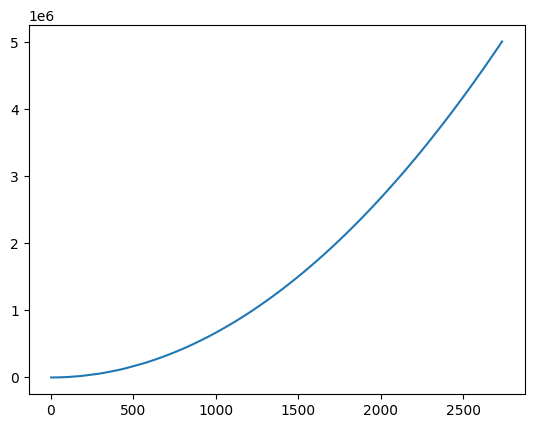

In [3]:
plt.plot(data[:,0], data[:,1])

In [4]:
diffs = [data[:,1]]
prev = diffs[0]
for _ in range(10):
    new_diff = []
    for i in range(len(prev)-1):
        new_diff.append( prev[i+1] - prev[i])
    diffs.append(new_diff)

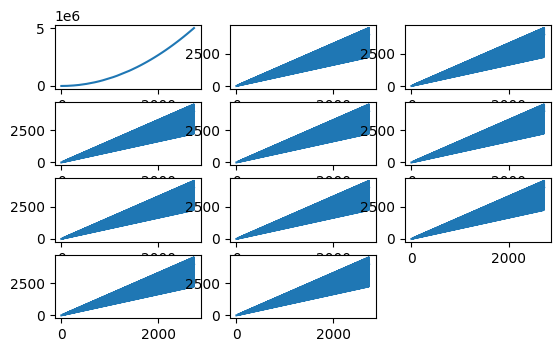

In [5]:
for (i, diff) in enumerate(diffs):
    plt.subplot(5,3,i+1)
    plt.plot(diff)


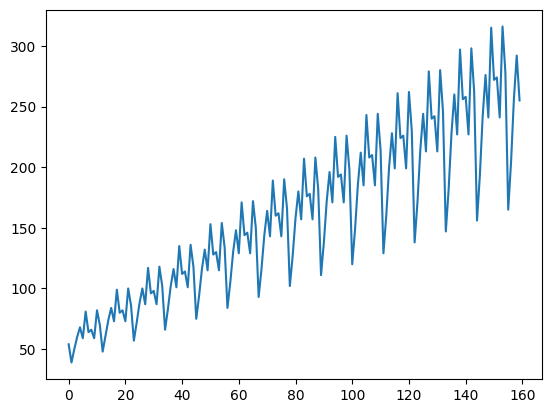

In [6]:
plt.plot(diffs[1][40:200])

0 [14, 16, 14, 18, 16, 16, 14, 18, 16, 9, 11] [14, 16, 14, 18, 16, 16, 14, 18, 16, 9, 11]


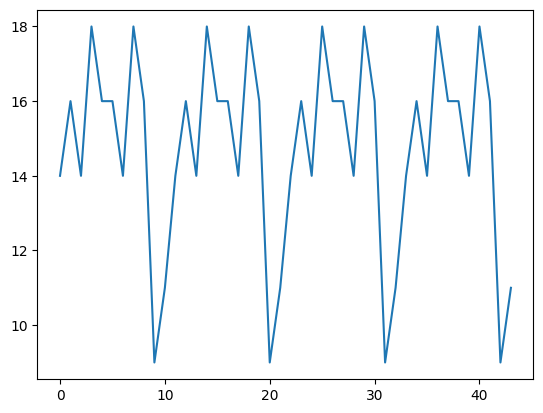

In [7]:
period_size = 11
period_start = 54 # does not to be exact start, just some period start
dy = diffs[1]
i = period_size
period_diffs = []
while i < len(dy) - period_size:
    period_diffs.append(dy[i + period_size] - dy[i])
    i += 1
plt.plot(period_diffs[period_start:period_start+4*period_size])
period = period_diffs[period_start:period_start+period_size]
test_period_2 = period_diffs[period_start+10*period_size:period_start+11*period_size]
print(np.sum(np.subtract(test_period_2,period)), period, test_period_2)

[-14 -16 -14 -18 -16 -16 -14 -18 -16  -9 -11]


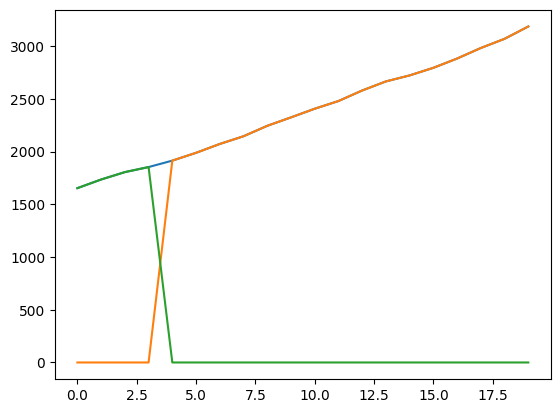

In [8]:
dy_window = dy[period_start:period_start+period_size]
print(np.subtract(dy_window, dy[period_start+period_size:period_start+2*period_size]))
ys_predicted = [0 for _ in range(period_start)]
ys_predicted.append(data[period_start,1])
for i in range(period_start, 10000):
    w = (i-period_start) % period_size
    ys_predicted.append(ys_predicted[-1] + dy_window[w])
    dy_window[w] += period[w]

plt.plot(data[50:70,1])
plt.plot(ys_predicted[50:70])
plt.plot(np.subtract(data[50:70,1],ys_predicted[50:70]))

In [9]:
print(ys_predicted[5000 - 1])

16733044
